In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
from os.path import dirname,join
import csv
import __main__
import json

import pandas as pd
import seaborn as sns

result_to_dump = '/home/mht/turtlebot3_ws/src/dist_bo/results/to_compare'

exp_names = ['multi_light_sparse', 'single_light', 'multi_light_dense']
agent_nums = ['single', 'multi']
exp_labels = {'multi_light_sparse': 'Sparse', 'single_light': 'Single', 'multi_light_dense': 'Dense'}
agent_labels = {'single': 'One', 'multi': 'Four'}
data_dfs = []

for exp_name in sorted(exp_names):
    exp_dir = join(result_to_dump, exp_name)
    for agent_num in agent_nums:
        single_exp_dir = join(exp_dir, agent_num)
        pose_df = pd.read_csv(os.path.join(single_exp_dir, 'data/pose.csv'))
        query_df = pd.read_csv(os.path.join(single_exp_dir, 'data/queries.csv'))
        data_df = pd.read_csv(os.path.join(single_exp_dir, 'data/data.csv'))
        data_dict = {'time':[pose_df['time'].values[-1] - pose_df['time'].values[0]], 
                     'dist':[data_df['distance_traveled'].values.sum()], 
                     'iterations': [len(query_df)],
                     'exp': exp_labels[exp_name], 'agent': agent_labels[agent_num]}
        data_dfs.append(pd.DataFrame.from_dict(data_dict))

total_df = pd.concat(data_dfs)



# SLIDES = True
# sns.set(style="darkgrid")

# pose_df = pd.read_csv(os.path.join(result_to_dump, 'pose.csv'))
# query_df = pd.read_csv(os.path.join(result_to_dump, 'queries.csv'))
# data_df = pd.read_csv(os.path.join(result_to_dump, 'data.csv'))
# pose_df['time'] = pose_df['time'] - pose_df['time'][0]

# data_df
total_df

,time,dist,iterations,exp,agent
0,1029.600008,45.889765,22,Dense,One
0,441.454653,55.131673,10,Dense,Four
0,850.400263,35.368170,25,Sparse,One
0,266.033870,19.005805,5,Sparse,Four
0,894.800040,34.000553,24,Single,One
0,405.228435,12.347201,8,Single,Four


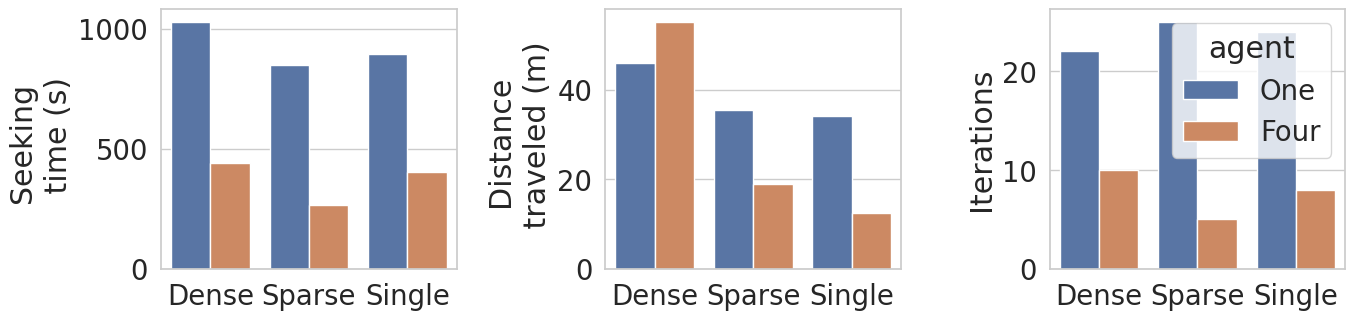

In [28]:
sns.set(style='whitegrid',font_scale=1.8)
plt.figure(figsize=(14, 4))
plt.subplot(131)
g = sns.barplot(data=total_df, x='exp', y='time', hue='agent')
plt.ylabel('Seeking \n time (s)')
g.legend_.remove()
plt
plt.xlabel('')
plt.subplot(132)
# plt.figure(figsize=(3, 3))
g = sns.barplot(data=total_df, x='exp', y='dist', hue='agent')
g.legend_.remove()
plt.ylabel('Distance \n traveled (m)')
plt.xlabel('')
# plt.figure(figsize=(3, 3))
plt.subplot(133)
g = sns.barplot(data=total_df, x='exp', y='iterations', hue='agent')
plt.ylabel('Iterations')
plt.tight_layout()
plt.xlabel('')
plt.savefig(os.path.join(result_to_dump,'one_four_compare.pdf'))

In [2]:
pose_df
query_df

,Unnamed: 0,agent1_x1,agent1_x2,agent2_x1,agent2_x2,agent3_x1,agent3_x2,agent4_x1,agent4_x2
0,0,-1.003049,1.010527,-1.991626,1.008380,-1.010688,2.007230,-2.010923,2.007894
1,0,-1.125487,1.483794,-2.322464,1.368552,-1.307857,2.396620,-2.377574,2.337881
2,0,-0.989059,1.953101,-2.061885,1.785200,-1.775704,2.524045,-1.913921,2.169821
3,0,-0.592000,1.798768,-1.648599,2.068810,-1.711457,2.611238,-2.168452,2.846015
4,0,-0.987863,2.091418,-2.110042,2.259306,-1.777653,3.147112,-2.059274,2.965976
5,0,-1.273610,2.492617,-1.622324,2.263596,-1.591616,3.114861,-1.436407,2.857153
6,0,-1.206200,2.519461,-1.905997,3.023731,-1.128787,3.277260,-1.503673,2.933825
7,0,-1.803734,2.550450,-2.368244,3.189469,-1.591052,3.164337,-1.522116,2.801916


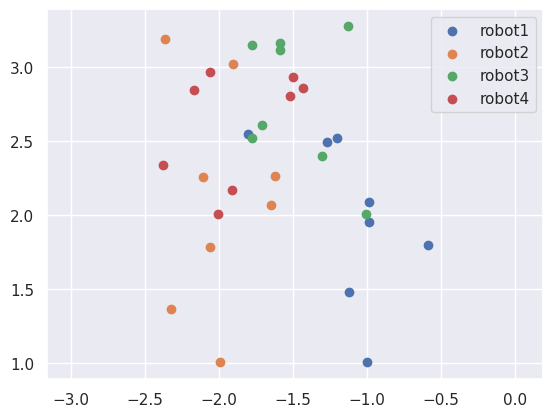

In [194]:
x1 = pose_df['MobileSensor3_x1'].values.reshape([-1, 4]).T
x1
x2 = pose_df['MobileSensor3_x2'].values.reshape([-1, 4]).T
time = pose_df['time'].values.reshape([-1, 4]).T
# fig, ax = plt.subplots()
# ax.scatter(pose_df['MobileSensor3_x1'].values, pose_df['MobileSensor3_x2'].values)
# ax.scatter(time[0], x2[0])
# ax.scatter(pose_df['time'].values, pose_df['MobileSensor3_x2'].values)
# ax.scatter(pose_df['time'].values, pose_df['MobileSensor3_x1'].values)

cmaps = ['Greys', 'Greens', 'Purples', 'Blues']

# fig, ax = plt.subplots()

for j in range(4):

    a1x1 = [pose_df['MobileSensor3_x1'].values[j]]
    a1x2 = [pose_df['MobileSensor3_x2'].values[j]]
    t1 = [pose_df['time'].values[j]]


#     for i in range(50, 800):
#         data1 = pose_df['MobileSensor3_x1'].values[4*(i+1):4*(i+2)]
#         data2 = pose_df['MobileSensor3_x2'].values[4*(i+1):4*(i+2)]
#         idx1 = np.argmin(np.abs(data1-a1x1[-1]))
#         idx2 = np.argmin(np.abs(data2-a1x2[-1]))
#         a1x1.append(data1[idx1]) if np.abs(data1[idx1] - a1x1[-1]) < 0.2 else a1x1.append(a1x1[-1])
#         a1x2.append(data2[idx2]) if np.abs(data2[idx2] - a1x2[-1]) < 0.2 else a1x2.append(a1x2[-1])
#         t1.append(pose_df['time'].values[4*(i+1):4*(i+2)][idx1])

#     ax.scatter(a1x1, a1x2, c=t1, cmap=cmaps[j])
# ax.axis('equal')
# ax.plot(t1, a1x1)



## Plot query distribution

In [45]:
query_dfs = []
for exp_name in sorted(exp_names):
    exp_dir = join(result_to_dump, exp_name)

    for agent_num in agent_nums:
        single_exp_dir = join(exp_dir, agent_num)
        print(single_exp_dir)
        query_dfs.append(pd.read_csv(os.path.join(single_exp_dir, 'data/queries.csv')))

query_dfs = query_dfs[:2]


/home/mht/turtlebot3_ws/src/dist_bo/results/to_compare/multi_light_dense/single
/home/mht/turtlebot3_ws/src/dist_bo/results/to_compare/multi_light_dense/multi
/home/mht/turtlebot3_ws/src/dist_bo/results/to_compare/multi_light_sparse/single
/home/mht/turtlebot3_ws/src/dist_bo/results/to_compare/multi_light_sparse/multi
/home/mht/turtlebot3_ws/src/dist_bo/results/to_compare/single_light/single
/home/mht/turtlebot3_ws/src/dist_bo/results/to_compare/single_light/multi


In [59]:
query_dfs[0]

,Unnamed: 0,agent1_x1,agent1_x2
0,0,-1.009129,1.003418
1,0,-2.327417,3.490118
2,0,-1.700987,3.506608
3,0,-1.319195,2.334699
4,0,-0.006645,2.855443
5,0,-2.590370,3.491635
6,0,-1.361091,2.771170
7,0,-0.952389,3.499380
8,0,-2.996077,2.463364
9,0,-2.131109,3.099556


ValueError: not enough values to unpack (expected 2, got 0)

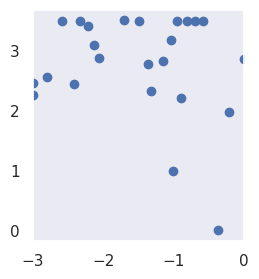

In [55]:
fig = plt.figure(figsize=(6, 3))
plt.subplot(121)
plt.scatter(query_dfs[0]['agent1_x1'], query_dfs[0]['agent1_x2'], label = 'robot1')
    
plt.xlim([-3, 0])
plt.ylim([])
plt.axis('equal')
plt.legend()

plt.subplot(122)
for j in range(1, 5):
    # for i in range(1, len(query_df) - 1):
    plt.scatter(query_dfs[1]['agent{}_x1'.format(j)], query_dfs[1]['agent{}_x2'.format(j)], label = 'robot{}'.format(j))

plt.axis('equal')
plt.legend()

-1.1158651113510132 2.5018866062164307
-1.319974422454834 2.1004068851470947
-3.010305643081665 3.495882511138916
-0.7972981929779053 2.629637718200684
-1.5585801601409912 2.529716968536377


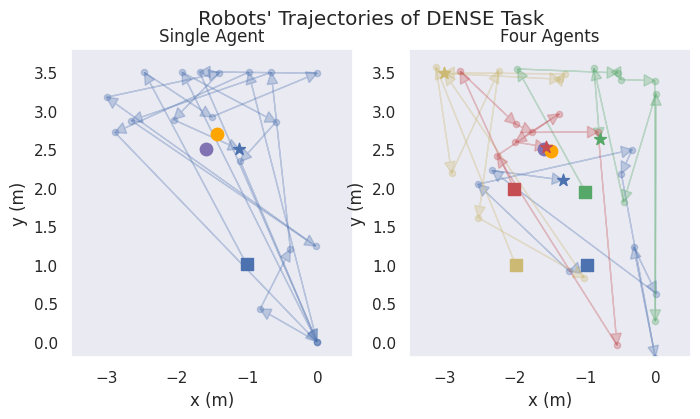

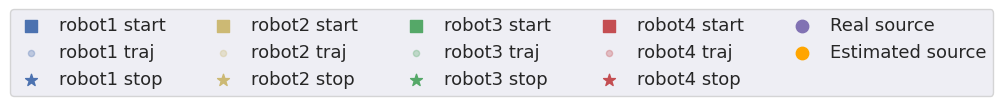

In [48]:
def plot_traj(query_df_f, i, ax):
    plt.scatter(query_df_f['agent{}_x1'.format(i)].values[0], query_df_f['agent{}_x2'.format(i)].values[0], label = 'robot{} start'.format(i), marker='s', s=80, zorder=10, color=colors[i - 1])
    plt.scatter(query_df_f['agent{}_x1'.format(i)].values[:-1], query_df_f['agent{}_x2'.format(i)].values[:-1], label = 'robot{} traj'.format(i), alpha=0.3, s=20, color=colors[i - 1])
    plt.scatter(query_df_f['agent{}_x1'.format(i)].values[-1], query_df_f['agent{}_x2'.format(i)].values[-1], label = 'robot{} stop'.format(i), marker='*', s=80, zorder=10, color=colors[i - 1])
    print(query_df_f['agent{}_x1'.format(i)].values[-1], query_df_f['agent{}_x2'.format(i)].values[-1])
    for j in range(len(query_df_f) - 1):
        plt.arrow(query_df_f['agent{}_x1'.format(i)][j], query_df_f['agent{}_x2'.format(i)][j], query_df_f['agent{}_x1'.format(i)][j+1] - query_df_f['agent{}_x1'.format(i)][j],
                  query_df_f['agent{}_x2'.format(i)][j+1] - query_df_f['agent{}_x2'.format(i)][j], color=colors[i - 1], length_includes_head = True,
                  alpha = 0.3, head_width=0.15, head_length=0.15)

    # lights = np.array([[-1.25, 2.24],[-1.25, 1.66],[-1.55, 1.96],[-0.85, 1.96]])
    # lights = lights + np.array([])
    leg1 = ax.legend(loc='upper right', fancybox=True, framealpha = 0.2)


    # return leg1



sns.set(style="dark")
colors = ['b', 'y', 'g', 'r']
alpha = 0.3
fig = plt.figure(figsize=(8, 4))
ax = plt.subplot(121)
plot_traj(query_dfs[0], 1, ax)
h, l = ax.get_legend_handles_labels()
ax.get_legend().remove()
plt.xlim([-3.5, 0.5])
plt.ylim([-0.2, 3.8])
plt.scatter(-1.58, 2.50, marker='o', color='m', label='Real source', s=80)
plt.scatter(-1.43, 2.7, marker='o', color='orange', label='Estimated source', s=80)
# plt.ylim([])
# plt.axis('equal')
# plt.legend()
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Single Agent')

ax = plt.subplot(122)
for i in range(1, 5):
    # for i in range(1, len(query_df) - 1):
    plot_traj(query_dfs[1], i, ax)
plt.scatter(-1.58, 2.50, marker='o', color='m', label='Real source', s=80)
plt.scatter(-1.48, 2.48, marker='o', color='orange', label='Estimated source', s=80)
h, l = ax.get_legend_handles_labels()
ax.get_legend().remove()
plt.xlim([-3.5, 0.5])
plt.ylim([-0.2, 3.8])
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Four Agents')
# plt.axis('equal')
# plt.legend()
# plt.tight_layout(pad=1.0)
fig.suptitle('Robots\' Trajectories of DENSE Task')
plt.savefig(os.path.join(result_to_dump, 'dense_traj.pdf'))

legfig, legax = plt.subplots(figsize=(10, 0.75))
legax.set_facecolor('white')
leg = legax.legend(h, l, loc='center', ncol=5, handlelength=1.5,
                   mode="expand", borderaxespad=0., prop={'size': 13}, )
legax.xaxis.set_visible(False)
legax.yaxis.set_visible(False)
for line in leg.get_lines():
    line.set_linewidth(12.0)
plt.tight_layout(pad=0.5)
plt.savefig(os.path.join(result_to_dump, 'legend_traj.pdf'))
